In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import ttest_ind, mannwhitneyu, ttest_1samp
from statannotations.Annotator import Annotator

In [2]:
df = pd.read_csv("variance_input_df.csv")
df["scaden_epi"] = df["scaden_epi"]
df["scaden_lymph"] = df["scaden_lymph"]
df["scaden_conn"] = df["scaden_conn"]
df.head()

,sid,scaden_epi,scaden_lymph,scaden_conn,epi_pan_neo,inflam,connective,dead,epi_pan_non_neo,epi_pan_perc,...,combined_neutro,combined_epi_perc,combined_inflam_perc,combined_conn_perc,combined_dead_perc,combined_lymph_perc,combined_macro_perc,combined_neutro_perc,scaden_own_epi,scaden_own_lymph
0,s_1,52.970474,5.178285,16.566755,166490,2660,172123,787,7844,49.8234,...,8,54.2372,2.2460,42.4649,0.3736,0.0223,0.6538,0.0022,42.978218,5.289809
1,s_10,52.645121,5.245831,17.140858,168454,749,124416,403,3365,57.7762,...,23,62.0702,1.2344,35.9429,0.1224,0.0236,0.5990,0.0075,42.795166,5.356659
2,s_100,50.960714,5.651194,17.921775,70602,505,51106,247,809,57.9310,...,1,60.5186,1.5562,36.8736,0.1893,0.0103,0.8513,0.0008,40.359056,5.884821
3,s_101,45.954159,5.936583,19.562240,87134,1963,161001,1206,5960,36.1862,...,79,41.6577,2.2414,54.5954,0.5328,0.0649,0.8778,0.0300,39.644746,5.206564
4,s_102,51.255738,5.412464,17.234221,73910,724,79778,139,4669,49.3525,...,9,53.7758,2.1093,43.2253,0.0949,0.0435,0.7457,0.0055,42.869715,5.160541


In [12]:
from scipy.stats import spearmanr, pearsonr
import numpy as np
correlation, p_value = spearmanr(df["epi_manual"], df["combined_epi_perc"])
'''print("Spearman's correlation coefficient:", correlation)
print("P-value:", p_value)
correlation, p_value = spearmanr(df["epi_manual"], df["epi_pan_perc"])
print("Spearman's correlation coefficient:", correlation)
print("P-value:", p_value)
correlation, p_value = spearmanr(df["epi_manual"], df["epi_mon_perc"])
print("Spearman's correlation coefficient:", correlation)
print("P-value:", p_value)'''

def concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    rho, _ = pearsonr(y_true, y_pred)
    ccc = (2 * rho * np.sqrt(var_true) * np.sqrt(var_pred)) / (var_true + var_pred + (mean_true - mean_pred)**2)
    return ccc

def bootstrap_ccc(df, col1, col2, n_bootstrap=1000):
    ccc_samples = []
    n = len(df)
    for _ in range(n_bootstrap):
        sample_indices = np.random.randint(0, n, n)  # Resample with replacement
        sample_true = df[col1].values[sample_indices]
        sample_pred = df[col2].values[sample_indices]
        ccc = concordance_correlation_coefficient(sample_true, sample_pred)
        ccc_samples.append(ccc)
    return ccc_samples


bootstrap_samples = bootstrap_ccc(df, 'epi_manual', 'combined_epi_perc')
ccc_value = concordance_correlation_coefficient(df['epi_manual'], df['combined_epi_perc'])
ccc_confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
print(ccc_value, ccc_confidence_interval)

bootstrap_samples = bootstrap_ccc(df, 'epi_manual', 'epi_pan_perc')
ccc_value = concordance_correlation_coefficient(df['epi_manual'], df['epi_pan_perc'])
ccc_confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
print(ccc_value, ccc_confidence_interval)

bootstrap_samples = bootstrap_ccc(df, 'epi_manual', 'epi_mon_perc')
ccc_value = concordance_correlation_coefficient(df['epi_manual'], df['epi_mon_perc'])
ccc_confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
print(ccc_value, ccc_confidence_interval)

df_new = df.copy()
df_new["lymph_inflam_perc"] = df_new["combined_inflam_perc"]+df_new["combined_lymph_perc"]
df_new["lymph_estimate"] = float(2.00)
print(df_new.head())


bootstrap_samples = bootstrap_ccc(df_new, 'lymph_estimate', 'lymph_inflam_perc')
ccc_value = concordance_correlation_coefficient(df_new['lymph_estimate'], df_new['lymph_inflam_perc'])
ccc_confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
print(ccc_value, ccc_confidence_interval)

bootstrap_samples = bootstrap_ccc(df_new, 'lymph_estimate', 'inflam_perc')
ccc_value = concordance_correlation_coefficient(df_new['lymph_estimate'], df_new['inflam_perc'])
ccc_confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
print(ccc_value, ccc_confidence_interval)

bootstrap_samples = bootstrap_ccc(df_new, 'lymph_estimate', 'lymph_perc')
ccc_value = concordance_correlation_coefficient(df_new['lymph_estimate'], df_new['lymph_perc'])
ccc_confidence_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
print(ccc_value, ccc_confidence_interval)


0.41171923379050146 [0.33502571 0.48648204]
0.4065192855998308 [0.3259496  0.47645715]
     sid  scaden_epi  scaden_lymph  scaden_conn  epi_pan_neo  inflam  \
0    s_1   52.970474      5.178285    16.566755       166490    2660   
1   s_10   52.645121      5.245831    17.140858       168454     749   
2  s_100   50.960714      5.651194    17.921775        70602     505   
3  s_101   45.954159      5.936583    19.562240        87134    1963   
4  s_102   51.255738      5.412464    17.234221        73910     724   

   connective  dead  epi_pan_non_neo  epi_pan_perc  ...  combined_inflam_perc  \
0      172123   787             7844       49.8234  ...                2.2460   
1      124416   403             3365       57.7762  ...                1.2344   
2       51106   247              809       57.9310  ...                1.5562   
3      161001  1206             5960       36.1862  ...                2.2414   
4       79778   139             4669       49.3525  ...                2.10

C:\Users\m139105\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


nan [nan nan]
nan [nan nan]


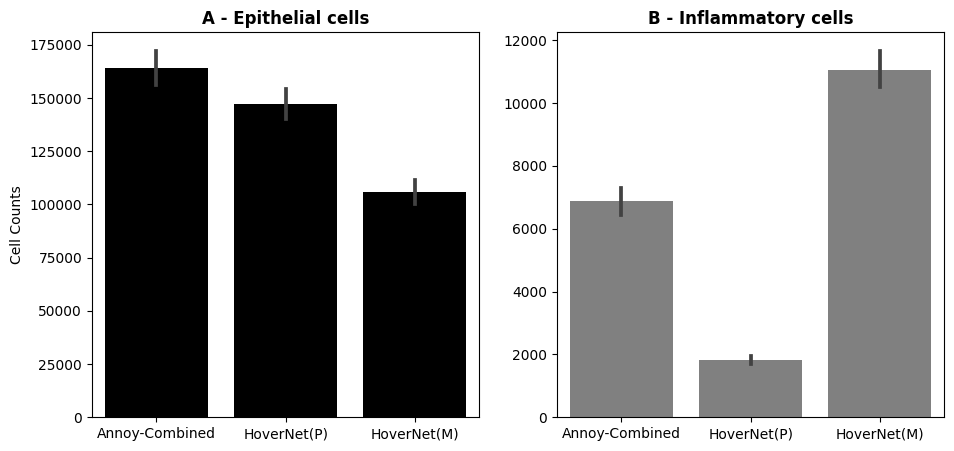

In [4]:
df_new = df.copy()
df_new["pan_epi"] = df["epi_pan_neo"]+df["combined_epi_non_neo"]
df_new["mon_inflam"] = df["lymph"]+df["macro"]+df["neutro"]
df_new["combined_epi"] = df["combined_neo_epi"]+df["combined_epi_non_neo"]
df_long = df_new.melt(value_vars=['combined_epi', 'pan_epi', 'epi_mon'], var_name='source', value_name='Value')
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
sns.barplot(data=df_long,x="source", y="Value", ax=ax[0], color="black")
df_long = df_new.melt(value_vars=['combined_inflam', 'inflam', 'mon_inflam'], var_name='source', value_name='Value')
sns.barplot(data=df_long,x="source", y="Value", ax=ax[1], color="gray")
ax[0].set_ylabel("Cell Counts")

ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[0].set_xlabel("")
new_labels = ['Annoy-Combined', 'HoverNet(P)', 'HoverNet(M)']
ax[0].set_xticks(ticks=[0, 1,2], labels=new_labels)
ax[1].set_xticks(ticks=[0, 1,2], labels=new_labels)

ax[0].set_title("A - Epithelial cells", fontsize=12, fontweight="bold")
ax[1].set_title("B - Inflammatory cells", fontsize=12, fontweight="bold")
plt.savefig("Cell_count_distribution.png", dpi=600)



<bound method NDFrame.head of             source   Value
0          all_mon  141388
1          all_mon  124371
2          all_mon   31426
3          all_mon   76686
4          all_mon   67585
...            ...     ...
1408  all_combined  299262
1409  all_combined  248228
1410  all_combined  287955
1411  all_combined  188994
1412  all_combined  571953

[1413 rows x 2 columns]>


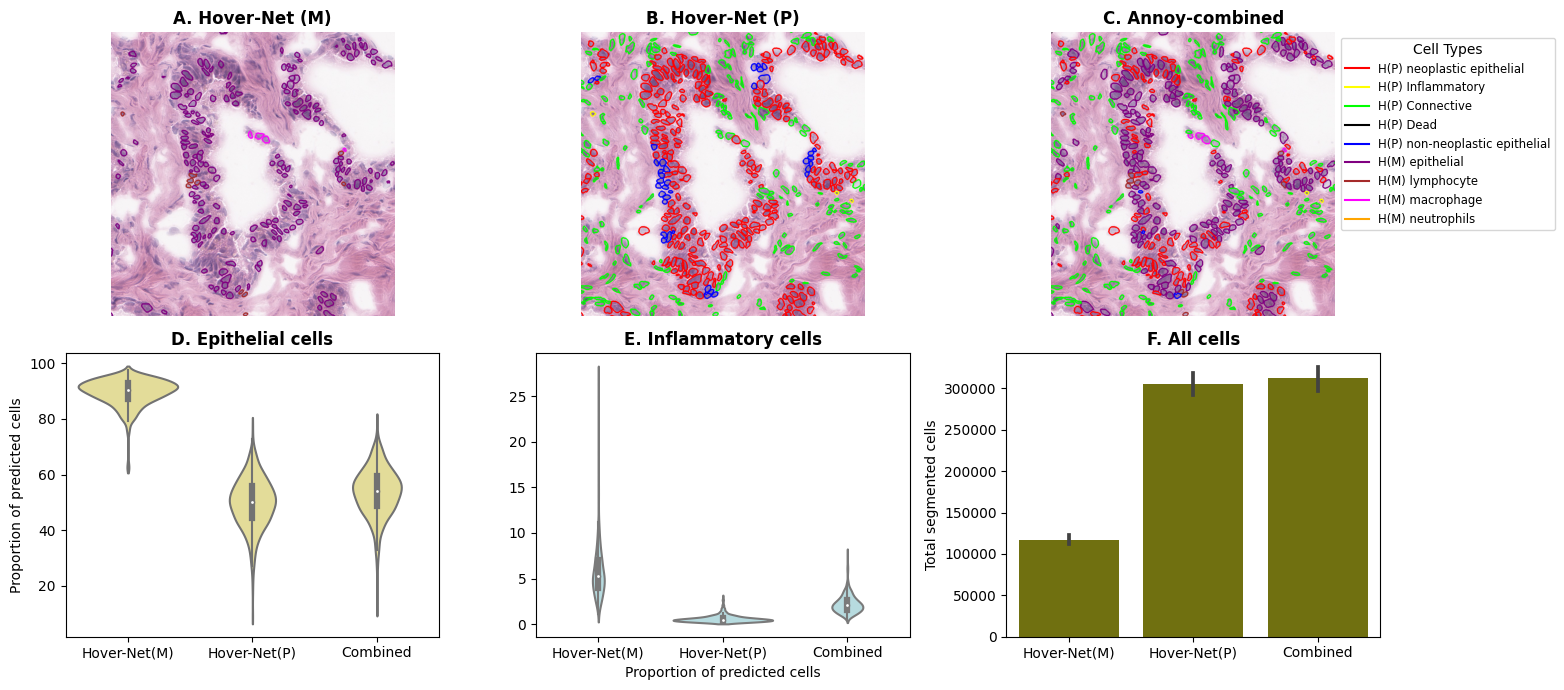

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
filename="tile_37888_27648.png"
path_to_png_1 = 'mon_' + filename
path_to_png_2 = 'pan_'+ filename
path_to_png_3 = 'combined_'+ filename


image1 = Image.open(path_to_png_1)
image2 = Image.open(path_to_png_2)
image3 = Image.open(path_to_png_3)

fig, ax = plt.subplots(2, 3, figsize=(14, 7))


ax[0][0].imshow(image1)
ax[0][0].set_title("A. Hover-Net (M)", fontsize=12, fontweight="bold")
ax[0][0].axis('off')

ax[0][1].imshow(image2)
ax[0][1].set_title("B. Hover-Net (P)", fontsize=12, fontweight="bold")
ax[0][1].axis('off')

ax[0][2].imshow(image3)
ax[0][2].set_title("C. Annoy-combined", fontsize=12, fontweight="bold")
ax[0][2].axis('off')

df_new = df.copy()
df_new["lymph_inflam_perc"] = df_new["combined_inflam_perc"]+df_new["combined_lymph_perc"]
#df_new["pan_epi"] = df["epi_pan_neo"]+df["epi_pan_non_neo"]
#df_new["mon_inflam"] = df["lymph"]+df["macro"]+df["neutro"]
#df_new["combined_all_inflam"] = df["combined_lymph"]+df["combined_macro"]+df["combined_neutro"]+df["combined_inflam"]
df_new["all_pan"] = df["inflam"]+df["epi_pan_neo"]+df["epi_pan_non_neo"]+df["connective"]+df["dead"]
df_new["all_mon"] = df["epi_mon"]+df["lymph"]+df["macro"]+df["neutro"]
df_new["all_combined"] =df["combined_neo_epi"]+df["combined_epi_non_neo"] + df["combined_lymph"]+df["combined_macro"]+df["combined_neutro"]+df["combined_inflam"] + df["combined_dead"] +df["combined_conn"] + df["combined_mon_unique_epi"]
#df_new["combined_epi"] = df["combined_neo_epi"]+df["combined_epi_non_neo"]

df_long = df_new.melt(value_vars=['epi_mon_perc',  'epi_pan_perc','combined_epi_perc',], var_name='source', value_name='Value')
sns.violinplot(data=df_long,x="source", y="Value", ax=ax[1][0], color="khaki", cut=1)
df_long = df_new.melt(value_vars=['lymph_perc','inflam_perc','lymph_inflam_perc' ], var_name='source', value_name='Value')
sns.violinplot(data=df_long,x="source", y="Value", ax=ax[1][1], color="powderblue", cut=1)
df_long = df_new.melt(value_vars=['all_mon','all_pan','all_combined' ], var_name='source', value_name='Value')

sns.barplot(data=df_long,x="source", y="Value", ax=ax[1][2], color="olive")
print(df_long.head)
ax[1][0].set_ylabel("Proportion of predicted cells")
ax[1][2].set_ylabel("Total segmented cells")

ax[1][1].set_ylabel("")
ax[1][1].set_xlabel("Proportion of predicted cells")
ax[1][0].set_xlabel("")
ax[1][2].set_xlabel("")

new_labels = ['Hover-Net(M)','Hover-Net(P)','Combined' ]
ax[1][0].set_xticks(ticks=[0, 1,2], labels=new_labels)
ax[1][1].set_xticks(ticks=[0, 1,2], labels=new_labels)
ax[1][2].set_xticks(ticks=[0, 1,2], labels=new_labels)

ax[1][0].set_title("D. Epithelial cells", fontsize=12, fontweight="bold")
ax[1][1].set_title("E. Inflammatory cells", fontsize=12, fontweight="bold")
ax[1][2].set_title("F. All cells", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.annotate('', xy=(50, 700), xytext=(0, 99),
             arrowprops=dict(facecolor='black', shrink=0.8))

categories = {
    "H(P) neoplastic epithelial": (255, 0, 0),
    "H(P) Inflammatory": (255, 255, 0),
    "H(P) Connective": (0, 255, 0),
    "H(P) Dead": (0, 0, 0),
    "H(P) non-neoplastic epithelial": (0, 0, 255),
    "H(M) epithelial": (128, 0, 128),
    "H(M) lymphocyte": (165, 42, 42),
    "H(M) macrophage": (255, 0, 255),
    "H(M) neutrophils": (255, 165, 0)
}

colors = {key: tuple(value[i]/255 for i in range(3)) for key, value in categories.items()}
for category, color in colors.items():
     ax[0][2].plot([], [], color=color, label=category)
ax[0][2].legend(loc='upper left',bbox_to_anchor=(1, 1), fontsize='small', title="Cell Types")
ax[0][2].arrow(1, 1, 1,1)


plt.savefig("Fig2_cell_seg.png", dpi=600,bbox_inches='tight')


In [50]:
import numpy as np
print(np.median(df["epi_pan_perc"]), np.median(df["epi_mon_perc"]), np.median(df["combined_epi_perc"]), np.mean(df["combined_conn_perc"]))
print(np.median(df["inflam_perc"]), np.median(df["lymph_perc"]), np.median(df["combined_lymph_perc"]+df["combined_inflam_perc"]))
print(np.mean(df_new["all_pan"]), np.mean(df_new["all_mon"]), np.mean(df_new["all_combined"]))
#print(df.head)

50.2655 90.54 54.202 43.04972377919321
0.5173 5.24 2.0817
304964.2929936306 117096.93418259024 312269.70912951167


In [33]:
t_statistic, p_value = ttest_1samp(df["combined_lymph_perc"], 2)

print(p_value)
if p_value / 2 < 0.05 and t_statistic < 0:
    print("Column A is significantly less than the threshold value.", float(p_value)/float(2))
else:
    print("Column A is not significantly less than the threshold value.")


res = ttest_1samp(df["combined_lymph_perc"], 2)
ci = res.confidence_interval(confidence_level=0.95)
print(ci)

0.0
Column A is significantly less than the threshold value. 0.0
ConfidenceInterval(low=0.027130389236876065, high=0.030220353862911623)


In [12]:
t_statistic, p_value = ttest_1samp(df["lymph_perc"], 2)

print(p_value)
if p_value / 2 < 0.05 and t_statistic < 0:
    print("Column A is significantly less than the threshold value.", float(p_value)/float(2))
else:
    print("Column A is not significantly less than the threshold value.")


res = ttest_1samp(df["lymph_perc"], 2)
ci = res.confidence_interval(confidence_level=0.95)
print(ci)

1.7509792065872263e-105
Column A is not significantly less than the threshold value.
ConfidenceInterval(low=5.487970095316648, high=6.000352622305433)


In [13]:
t_statistic, p_value = ttest_1samp(df["inflam_perc"], 2)

print(p_value)
if p_value / 2 < 0.05 and t_statistic < 0:
    print("Column A is significantly less than the threshold value.", float(p_value)/float(2))
else:
    print("Column A is not significantly less than the threshold value.")


res = ttest_1samp(df["inflam_perc"], 2)
ci = res.confidence_interval(confidence_level=0.95)
print(ci)

3.449086504285675e-266
Column A is significantly less than the threshold value. 1.7245432521428374e-266
ConfidenceInterval(low=0.5818240514605826, high=0.6533033370744492)


       source  lymphocyte_estimates
0  lymph_perc                  4.86
1  lymph_perc                  2.82
2  lymph_perc                  5.61
3  lymph_perc                  6.94
4  lymph_perc                  4.86
1.4530616422315537e-06


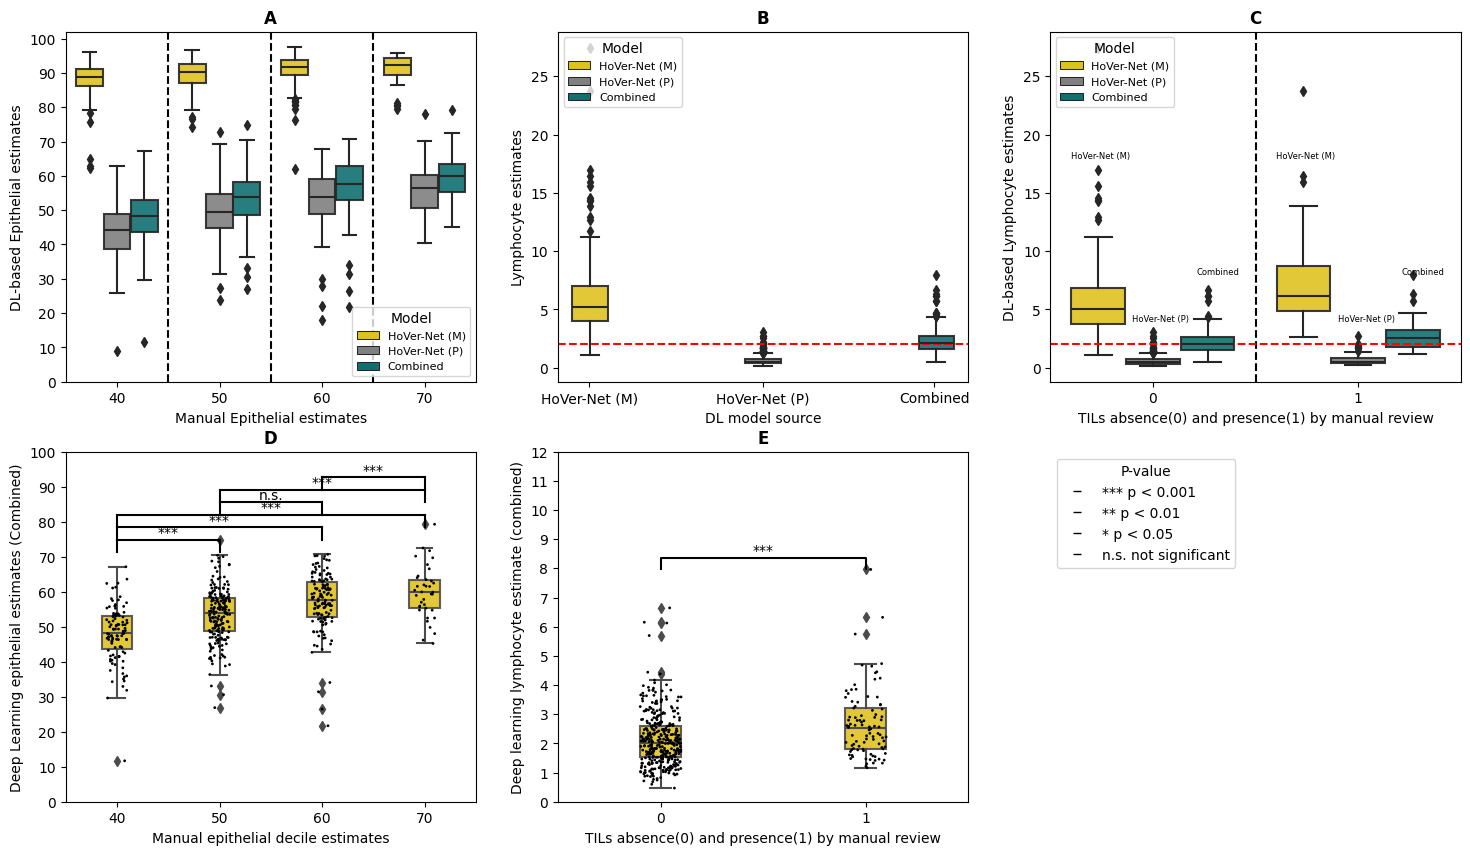

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

df["lymph_inflam_perc"] = df["combined_inflam_perc"]+df["combined_lymph_perc"]

df_long = df.melt(id_vars=['epi_manual'], value_vars=['epi_mon_perc','epi_pan_perc','combined_epi_perc'], var_name='source', value_name='Value')
sns.boxplot(x='epi_manual', y='Value', hue='source', data=df_long,boxprops={'alpha': 0.9}, palette=['gold', 'gray', 'teal'], ax=ax[0][0])
ax[0][0].set_yticks(range(0, 101, 10))
legend = ax[0][0].legend(title='Model',loc='lower right', fontsize=8)
new_labels = ['HoVer-Net (M)','HoVer-Net (P)','Combined' ]
for t, label in zip(legend.texts, new_labels):  
    t.set_text(label)
ax[0][0].set_ylabel("DL-based Epithelial estimates")
ax[0][0].axvline(0.5, color='black', linestyle="--")
ax[0][0].axvline(1.5, color='black', linestyle="--")
ax[0][0].axvline(2.5, color='black', linestyle="--")
ax[0][0].set_xlabel("Manual Epithelial estimates")

df_melted = df.melt(value_vars=['lymph_perc','inflam_perc','lymph_inflam_perc'], var_name='source', value_name='lymphocyte_estimates')
print(df_melted.head())
sns.boxplot(x=df_melted["source"], y=df_melted["lymphocyte_estimates"], hue=df_melted["source"], ax=ax[0][1], boxprops={'alpha': 0.9}, palette=['gold', 'gray', 'teal'])
legend = ax[0][1].legend(title='Model',loc='upper left', fontsize=8)
new_labels = ['HoVer-Net (M)','HoVer-Net (P)','Combined' ]
for t, label in zip(legend.texts, new_labels):  
    t.set_text(label)
ax[0][1].set_ylabel("Lymphocyte estimates")
new_labels = ['HoVer-Net (M)','HoVer-Net (P)','Combined']
ax[0][1].set_xticks(ticks=[-0.27, 1,2.25], labels=new_labels)
ax[0][1].set_xlabel("DL model source")

df_long = df.melt(id_vars=['lymph_manual'], value_vars=['lymph_perc','inflam_perc','lymph_inflam_perc'], var_name='source', value_name='Value')
sns.boxplot(x='lymph_manual', y='Value', hue='source', data=df_long,boxprops={'alpha': 0.9}, palette=['gold', 'gray', 'teal'], ax=ax[0][2])
ax[0][2].set_yticks(range(0, 30, 5))
legend = ax[0][2].legend(title='Model',loc='upper left', fontsize=8)
new_labels = ['HoVer-Net (M)','HoVer-Net (P)','Combined']
for t, label in zip(legend.texts, new_labels):  
    t.set_text(label)
ax[0][2].set_ylabel("DL-based Lymphocyte estimates")
ax[0][2].set_xlabel("TILs absence(0) and presence(1) by manual review")
ax[0][2].axvline(0.5, color='black', linestyle="--")
ax[0][1].axhline(2, color='red', linestyle="--")
ax[0][2].axhline(2, color='red', linestyle="--")
ax[0][2].text(x=-0.1, y=4, s="HoVer-Net (P)", fontsize=6)
ax[0][2].text(x=-0.4, y=18, s="HoVer-Net (M)", fontsize=6)
ax[0][2].text(x=0.21, y=8, s="Combined", fontsize=6)
ax[0][2].text(x=0.6, y=18, s="HoVer-Net (M)", fontsize=6)
ax[0][2].text(x=0.9, y=4, s="HoVer-Net (P)", fontsize=6)
ax[0][2].text(x=1.21, y=8, s="Combined", fontsize=6)




from scipy.stats import ttest_ind
import numpy as np

my_colors = {0: 'grey', 1: 'white'}

def pvalue_to_asterisks(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'n.s.'

def add_pvalue_annotation(ax, x1, x2, y, h, p_value):
    asterisks = pvalue_to_asterisks(p_value)
    ax.plot([x1, x1], [y, y + h], lw=1.5, c='black')  
    ax.plot([x2, x2], [y, y + h], lw=1.5, c='black')  
    ax.plot([x1, x2], [y + h, y + h], lw=1.5, c='black')  
    ax.text((x1 + x2) * .5, y + h, asterisks, ha='center', va='bottom', color='black')


sns.boxplot(data=df, y="combined_epi_perc", x="epi_manual", color="gold", boxprops={'alpha': 0.9}, width=0.3, ax= ax[1][0])
sns.stripplot(data=df, x="epi_manual", y="combined_epi_perc", ax=ax[1][0], color="black", size=2)
groups = df['epi_manual'].unique()
height = df['combined_epi_perc'].max() * 0.9
h_increment = height * 0.05
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = df[df['epi_manual'] == groups[i]]['combined_epi_perc']
        group2 = df[df['epi_manual'] == groups[j]]['combined_epi_perc']
        _, p_value = ttest_ind(group1, group2)
        add_pvalue_annotation(ax[1][0], i, j, height, h_increment, p_value)
        height += h_increment
ax[1][0].set_xlabel("Manual epithelial decile estimates")
ax[1][0].set_ylabel("Deep Learning epithelial estimates (Combined)")
ax[1][0].set_yticks(range(0, 101, 10))


sns.boxplot(x=df["lymph_manual"], y=df["lymph_inflam_perc"],color="gold",boxprops={'alpha': 0.9}, width=0.2, ax=ax[1][1])
sns.stripplot(data=df, x="lymph_manual", y="lymph_inflam_perc", ax=ax[1][1], color="black", size=2)

group1 = df[df["lymph_manual"] == 0]["lymph_inflam_perc"]
group2 = df[df["lymph_manual"] == 1]["lymph_inflam_perc"]
_, p_value = ttest_ind(group1, group2)
print(p_value)
max_height = max(df["lymph_inflam_perc"].max(), group1.max(), group2.max())
h = max_height * 0.05  
ax[1][1].plot([0, 0, 1, 1], [max_height, max_height + h, max_height + h, max_height], lw=1.5, c='black')
asterisks = pvalue_to_asterisks(p_value)
ax[1][1].text(0.5, max_height + h, asterisks, ha='center', va='bottom', color='black')
ax[1][1].set_yticks(range(0, 13, 1))
ax[1][1].set_xlabel("TILs absence(0) and presence(1) by manual review")
ax[1][1].set_ylabel("Deep learning lymphocyte estimate (combined)")

ax[0][0].set_title("A", fontsize=12, fontweight="bold")
ax[0][1].set_title("B", fontsize=12, fontweight="bold")
ax[0][2].set_title("C", fontsize=12, fontweight="bold")
ax[1][0].set_title("D", fontsize=12, fontweight="bold")
ax[1][1].set_title("E", fontsize=12, fontweight="bold")


legend_labels = ['*** p < 0.001', '** p < 0.01', '* p < 0.05', 'n.s. not significant']
handles = [plt.Line2D([0], [0], color='black', label=label, marker='_', linestyle='') for label in legend_labels]
ax[1][2].legend(handles=handles, title="P-value", loc='upper left')

for spine in ax[1][2].spines.values():
    spine.set_visible(False)
ax[1][2].set_xticks([])
ax[1][2].set_yticks([])


plt.savefig("Fig1_estimates_models.png", dpi=600)


In [17]:



def calc_conf(columnreq):
    n_bootstraps = 10000

    bootstrap_medians = np.empty(n_bootstraps)
    for i in range(n_bootstraps):
        sample = np.random.choice(columnreq, size=len(columnreq), replace=True)
        bootstrap_medians[i] = np.median(sample)

    lower_bound = np.percentile(bootstrap_medians, 2.5)
    upper_bound = np.percentile(bootstrap_medians, 97.5)

    print(f"95% CI for the median: [{lower_bound}, {upper_bound}]")

print(np.median(df["lymph_inflam_perc"]))
calc_conf(df["lymph_inflam_perc"])
print(np.median(df["inflam_perc"]))
calc_conf(df["inflam_perc"])
print(np.median(df["lymph_perc"]))
calc_conf(df["lymph_perc"])

2.0817
95% CI for the median: [2.0039, 2.1635]
0.5173
95% CI for the median: [0.4981, 0.5479]
5.24
95% CI for the median: [5.02, 5.47]


In [25]:
df = pd.read_csv("variance_explained_df_scaden_included.csv")
print(len(df))
df.head()

24075


,Unnamed: 0,Row.names,epi_manual,lymph_manual,manual_residuals,epi_pan_perc,inflam_perc,pan_residuals,epi_mon_perc,lymph_perc,mon_residuals,combined_epi_perc,combined_total_lymph_perc,combined_residuals,scaden_epi,scaden_lymph,scaden_residuals
0,ENSG00000000003,ENSG00000000003,0.122985,0.027436,0.849579,0.237611,0.002377,0.760012,0.030529,0.115735,0.853736,0.225444,2.130017e-02,0.753256,0.443115,0.003471,0.553414
1,ENSG00000000005,ENSG00000000005,0.006742,0.017411,0.975846,0.008468,0.002015,0.989517,0.018576,0.015756,0.965668,0.015402,1.454294e-02,0.970055,0.000807,0.021639,0.977555
2,ENSG00000000419,ENSG00000000419,0.027853,0.005394,0.966754,0.064347,0.018037,0.917616,0.001487,0.084265,0.914248,0.053386,5.601565e-02,0.890598,0.059666,0.024731,0.915603
3,ENSG00000000457,ENSG00000000457,0.035694,0.000039,0.964267,0.028883,0.013391,0.957726,0.023363,0.004737,0.971901,0.030092,1.041685e-02,0.959491,0.047111,0.000154,0.952735
4,ENSG00000000460,ENSG00000000460,0.013698,0.007315,0.978988,0.000116,0.000869,0.999016,0.001359,0.000428,0.998212,0.000184,2.448385e-07,0.999815,0.000205,0.003529,0.996266


<Figure size 640x480 with 0 Axes>

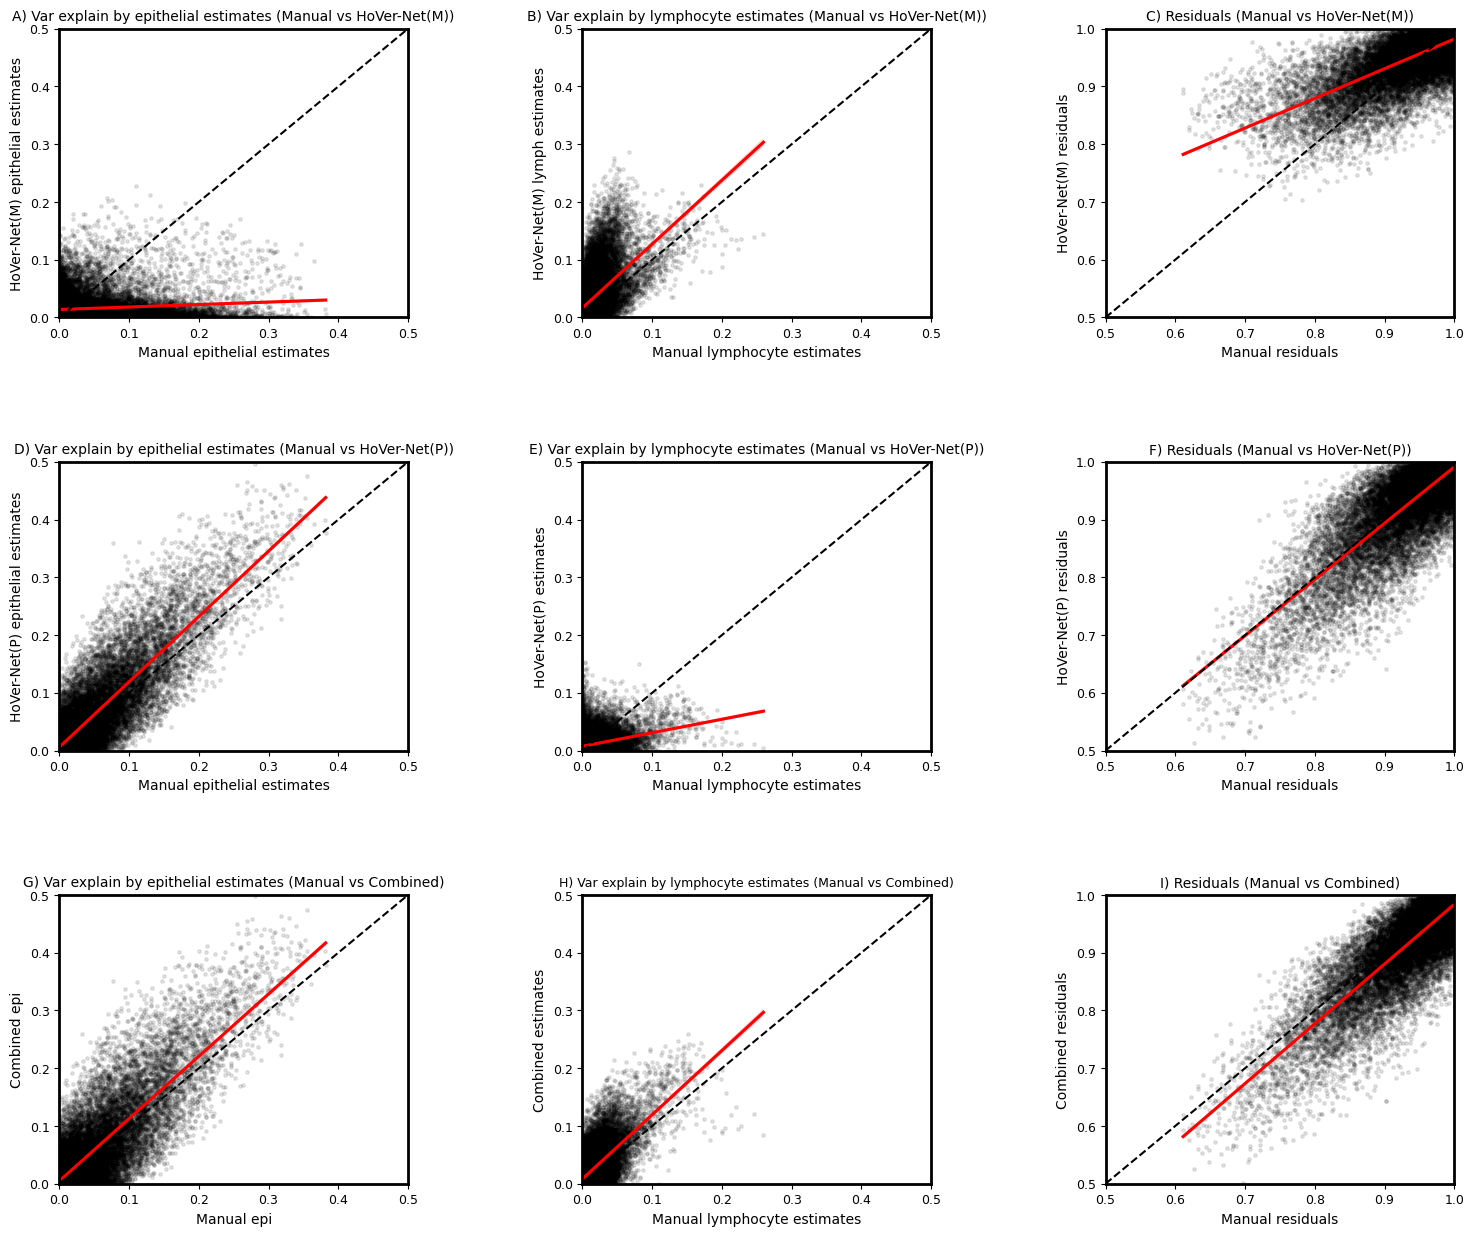

In [29]:
plt.clf()
fig, ax = plt.subplots(3, 3, figsize=(18, 15))
for eachax in ax.flatten():
    eachax.tick_params(axis='both', labelsize=9)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
formatter = ticker.StrMethodFormatter("{x:,.0f}")



#### MON

sns.regplot(data=df, x="epi_manual", y="epi_mon_perc", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[0][0])
ax[0][0].set_title("A) Var explain by epithelial estimates (Manual vs HoVer-Net(M))", fontsize=10)
ax[0][0].set_xlim(0,0.5)
ax[0][0].set_ylim(0,0.5)
ax[0][0].set_xlabel("Manual epithelial estimates", fontsize=10)
ax[0][0].set_ylabel("HoVer-Net(M) epithelial estimates", fontsize=10)
xlim = ax[0][0].get_xlim()
ylim = ax[0][0].get_ylim()
ax[0][0].plot(xlim, ylim, color='black', linestyle='--')

sns.regplot(data=df, x="lymph_manual", y="lymph_perc", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[0][1])
ax[0][1].set_title("B) Var explain by lymphocyte estimates (Manual vs HoVer-Net(M))", fontsize=10)
ax[0][1].set_xlim(0,0.5)
ax[0][1].set_ylim(0,0.5)
ax[0][1].set_xlabel("Manual lymphocyte estimates", fontsize=10)
ax[0][1].set_ylabel("HoVer-Net(M) lymph estimates", fontsize=10)
xlim = ax[0][1].get_xlim()
ylim = ax[0][1].get_ylim()
ax[0][1].plot(xlim, ylim, color='black', linestyle='--')

sns.regplot(data=df, x="manual_residuals", y="mon_residuals", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[0][2])
ax[0][2].set_title("C) Residuals (Manual vs HoVer-Net(M))", fontsize=10)
ax[0][2].set_xlim(0.5,1)
ax[0][2].set_ylim(0.5,1)
ax[0][2].set_xlabel("Manual residuals", fontsize=10)
ax[0][2].set_ylabel("HoVer-Net(M) residuals", fontsize=10)
xlim = ax[0][2].get_xlim()
ylim = ax[0][2].get_ylim()
ax[0][2].plot(xlim, ylim, color='black', linestyle='--')

##PAN

sns.regplot(data=df, x="epi_manual", y="epi_pan_perc", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[1][0])
ax[1][0].set_title("D) Var explain by epithelial estimates (Manual vs HoVer-Net(P))", fontsize=10)
ax[1][0].set_xlim(0,0.5)
ax[1][0].set_ylim(0,0.5)
ax[1][0].set_xlabel("Manual epithelial estimates", fontsize=10)
ax[1][0].set_ylabel("HoVer-Net(P) epithelial estimates", fontsize=10)
xlim = ax[1][0].get_xlim()
ylim = ax[1][0].get_ylim()
ax[1][0].plot(xlim, ylim, color='black', linestyle='--')

sns.regplot(data=df, x="lymph_manual", y="inflam_perc", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[1][1])
ax[1][1].set_title("E) Var explain by lymphocyte estimates (Manual vs HoVer-Net(P))", fontsize=10)
ax[1][1].set_xlim(0,0.5)
ax[1][1].set_ylim(0,0.5)
ax[1][1].set_xlabel("Manual lymphocyte estimates", fontsize=10)
ax[1][1].set_ylabel("HoVer-Net(P) estimates", fontsize=10)
xlim = ax[1][1].get_xlim()
ylim = ax[1][1].get_ylim()
ax[1][1].plot(xlim, ylim, color='black', linestyle='--')

sns.regplot(data=df, x="manual_residuals", y="pan_residuals", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[1][2])
ax[1][2].set_title("F) Residuals (Manual vs HoVer-Net(P))", fontsize=10)
ax[1][2].set_xlim(0.5,1)
ax[1][2].set_ylim(0.5,1)
ax[1][2].set_xlabel("Manual residuals", fontsize=10)
ax[1][2].set_ylabel("HoVer-Net(P) residuals", fontsize=10)
xlim = ax[1][2].get_xlim()
ylim = ax[1][2].get_ylim()
ax[1][2].plot(xlim, ylim, color='black', linestyle='--')


#### COMBINED
sns.regplot(data=df, x="epi_manual", y="combined_epi_perc", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[2][0])
ax[2][0].set_title("G) Var explain by epithelial estimates (Manual vs Combined)", fontsize=10)
ax[2][0].set_xlim(0,0.5)
ax[2][0].set_ylim(0,0.5)
ax[2][0].set_xlabel("Manual epi", fontsize=10)
ax[2][0].set_ylabel("Combined epi", fontsize=10)
xlim = ax[2][0].get_xlim()
ylim = ax[2][0].get_ylim()
ax[2][0].plot(xlim, ylim, color='black', linestyle='--')

sns.regplot(data=df, x="lymph_manual", y="combined_total_lymph_perc", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[2][1])
ax[2][1].set_title("H) Var explain by lymphocyte estimates (Manual vs Combined)", fontsize=9)
ax[2][1].set_xlim(0,0.5)
ax[2][1].set_ylim(0,0.5)
ax[2][1].set_xlabel("Manual lymphocyte estimates", fontsize=10)
ax[2][1].set_ylabel("Combined", fontsize=10)
xlim = ax[2][1].get_xlim()
ylim = ax[2][1].get_ylim()
ax[2][1].plot(xlim, ylim, color='black', linestyle='--')

sns.regplot(data=df, x="manual_residuals", y="combined_residuals", color="black", scatter_kws={'s': 6, 'alpha': 0.1}, line_kws={'color':'red'}, ax=ax[2][2])
ax[2][2].set_title("I) Residuals (Manual vs Combined)", fontsize=10)
ax[2][2].set_xlim(0.5,1)
ax[2][2].set_ylim(0.5,1)
ax[2][2].set_xlabel("Manual residuals", fontsize=10)
ax[2][2].set_ylabel("Combined residuals", fontsize=10)
xlim = ax[2][2].get_xlim()
ylim = ax[2][2].get_ylim()
ax[2][2].plot(xlim, ylim, color='black', linestyle='--')

for axis in ax.flat:
    axis.spines['top'].set_linewidth(2)
    axis.spines['top'].set_color('black')
    axis.spines['right'].set_linewidth(2)
    axis.spines['right'].set_color('black')
    axis.spines['bottom'].set_linewidth(2)
    axis.spines['bottom'].set_color('black')
    axis.spines['left'].set_linewidth(2)
    axis.spines['left'].set_color('black')


col_headings = ['Epithelial', 'Lymphocytes', 'Residuals']
row_headings = ['HoverNet\n(PanNuke)', 'HoverNet\n(MoNusac)', 'HoverNet\n(Annoy merged)']

plt.savefig("variance_Explained.png",dpi=300)
